In [1]:
### IMPORT LIBRARIES AND FILES  ###
import numpy as np
import pandas as pd
import sys

from Data import get_data   #.get_data_batch (dataset_name, batch)
from Single_Clustering import Features  #.cluster_features(train, test, data, num_cluster, batch, dataset)
from Single_Clustering import Graph#.cluster_graph(train, test,data, num_cluster, batch, dataset)
from Single_Clustering import Time_Series#.cluster_kshape(train, test,data, num_cluster, batch, dataset)

from Ensembles import Graph_ensemble #do_graph(list_ensembles, nEnsCluster=5, iterations=10, verbose = True, N_clusters_max = 5, hdf5_file_name=None)
from Ensembles import Mixture_Models#.do_mixturemodels(list_ensembles, nEnsCluster=5, iterations=10, verbose = True, N_clusters_max = 5, hdf5_file_name=None)
from Ensembles import Voting#.do_voting(list_ensembles, nEnsCluster=5, iterations=10, verbose = True, N_clusters_max = 5, hdf5_file_name=None
from Ensembles import Simple_GMM
from Ensembles import Multivariate_GMM
from Ensembles import GMM_PCA
from Ensembles import GMM_PCA_weighted
from Ensembles import GMM_PCA_mean
from Ensembles import GMM_MCA_mean
from Ensembles import Multivariate_GMM_mean
from Ensembles import Voting_MM_GMM
from Ensembles import Voting_MM_GMM_mean
from Ensembles import Consensus_GMM
from Ensembles import Consensus_GMM_torch
from Ensembles import Voting_MM_GMM_torch
from Ensembles import Multivariate_GMM_torch

from Next_best_action import Catboost_nba#do_catboost(train, test,data, return_pred, dataset)
from Next_best_action import Lightfm_nba #do_lightfm(train, test, data, return_pred, dataset)
from Next_best_action import easiest_nba #easiest(train, test, data, return_pred, dataset)
from Next_best_action import xgboost_nba #do_xgboost(train, test, data, return_pred, dataset)
from Next_best_action import MixedLM_nba #do_xgboost(train, test, data, return_pred, dataset)




In [4]:
#Get dataset
batch='users_2000'
dataset_list=['instacart']
for dataset in dataset_list:
    train, test, data=get_data.get_data_batch(dataset, batch)

(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(294701, 15)
(1000000, 14)
(1000000, 14)
(139788, 14)


## SINGLE CLUSTERING

### Time Series

In [30]:
ts, ts_index=Time_Series.make_timeseries(train, 'instacart')

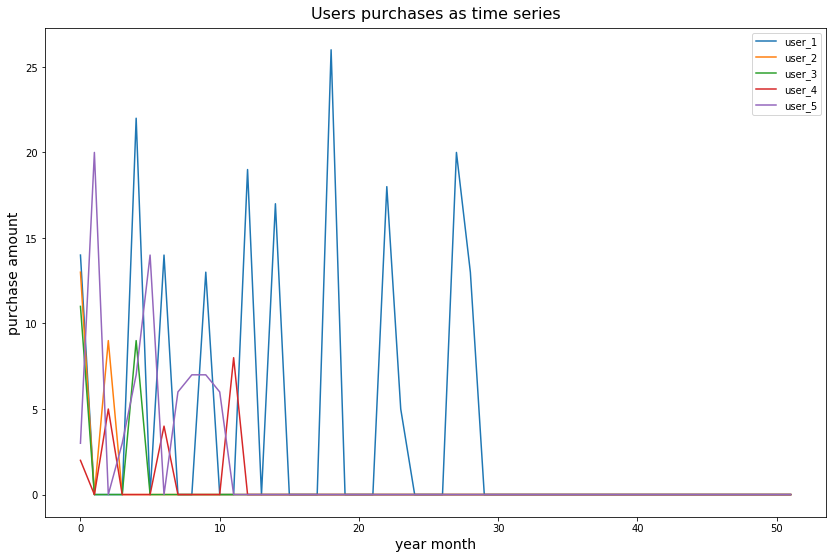

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("muted")
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}


plt.figure(figsize=(14,9))
plt.plot(ts[0])
plt.plot(ts[1])
plt.plot(ts[4])
plt.plot(ts[3])
plt.plot(ts[7])

plt.legend(['user_1', 'user_2', 'user_3', 'user_4', 'user_5'], loc='best')
plt.ylabel('purchase amount', **axis_font)
plt.xlabel('year month', **axis_font)
plt.title('Users purchases as time series', **title_font)
#plt.savefig('TS_instacart.png', dpi=300)
plt.show()

In [32]:
def plot_data(ks, X_train, y_pred, sz, n_clusters=3, centroid=False):
    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'14'}

    plt.figure(figsize=(12, 10))
    for yi in range(num_cluster):
        plt.subplot(num_cluster, 1, 1 + yi)
        for xx in X_train[y_pred == yi]:
            # , alpha=.2
            plt.plot(xx.ravel(), "k-")
            # ,
        if centroid:
            plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        # plt.ylim(-4, 4)
        plt.title("Cluster %d" % (yi + 1), **title_font)

    plt.tight_layout()
    #plt.savefig('TS_cluster_instacart.png', dpi=300)
    plt.show()

0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
For n_clusters = 5 The average silhouette_score is : -0.0029981082115090292


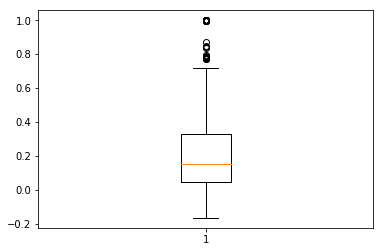

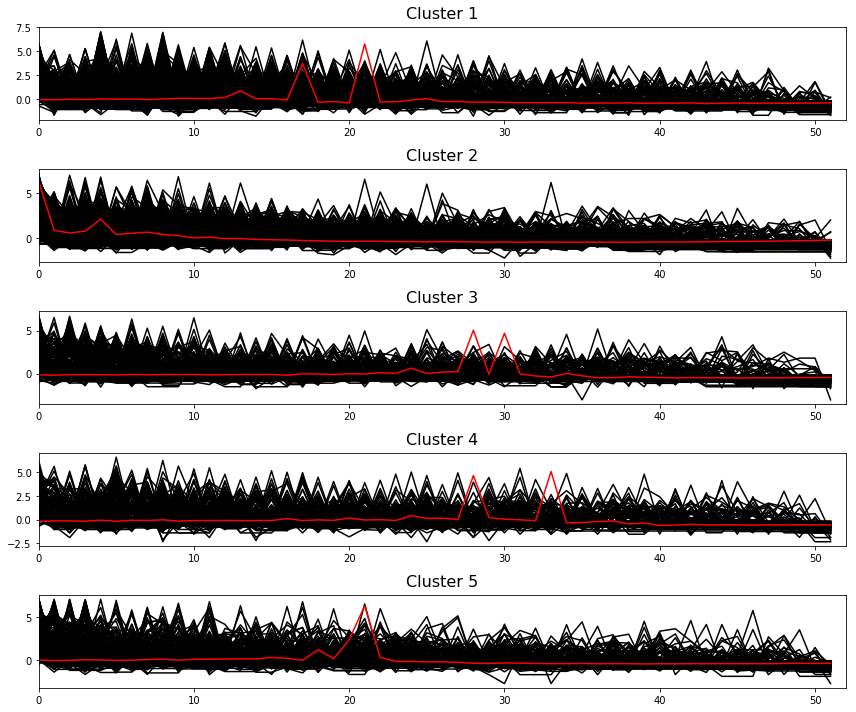

In [33]:
import tslearn
num_cluster=5
formatted_dataset = Time_Series.to_time_series_dataset(ts)
X_train, sz = Time_Series.normalize_data(formatted_dataset)
ks, y_pred = Time_Series.k_shape(X_train, n_clusters=num_cluster)
scores = Time_Series.compute_scores(ks, X_train, y_pred)
plt.boxplot(scores)
silhouette= tslearn.clustering.silhouette_score(X_train, y_pred, metric="euclidean")
print("For n_clusters =", num_cluster,
        "The average silhouette_score is :", silhouette)
plot_data(ks, X_train, y_pred, sz, ks.n_clusters, centroid=True)

### Finding number of clusters

In [34]:
#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#cols_to_use=['feature_1', 'feature_2', 'feature_3',
#        'num_transactions', 'sum_trans', 'mean_trans',
#       'std_trans', 'min_trans', 'max_trans', 'year_first', 'month_first']
#target_col=['target']

user_features=['user_id','total', 'total_reorder', 'Totalmin', 'Totalmax',
       'Totalmean', 'order_numbermax', 'days_since_prior_ordermin',
       'days_since_prior_ordermax', 'days_since_prior_ordermean',
       'reordermin', 'reordermax', 'reordermean',
       'order_hour_of_daymin', 'order_hour_of_daymax', 'order_hour_of_daymean',
       'days_since_prior_ordermin', 'days_since_prior_ordermax',
       'days_since_prior_ordermean', 'order_dowmean']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cluster_range = np.arange(5,55,5)
cluster_errors = []
cluster_silhouette=[]

train_scaled = scaler.fit_transform( train1[user_features])

for num_clusters in cluster_range:
    print(num_clusters)
    clusters = KMeans( num_clusters )
    clusters.fit( train_scaled )
    cluster_labels = clusters.fit_predict( train_scaled)
    silhouette_avg = silhouette_score(train_scaled, cluster_labels)
    cluster_errors.append( clusters.inertia_ )
    cluster_silhouette.append(silhouette_avg)

/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


5
10
15
20
25
30
35
40
45
50


In [35]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors, "cluster_silhouette": cluster_silhouette } )

In [36]:
clusters_df 

,num_clusters,cluster_errors,cluster_silhouette
0,5,22987.570017,0.161900
1,10,18696.670762,0.129619
2,15,16561.973424,0.108054
3,20,15374.849069,0.104013
4,25,14512.351788,0.097695
5,30,13797.455403,0.097253
6,35,13148.046842,0.093341
7,40,12687.948691,0.095795
8,45,12290.012464,0.093927
9,50,11889.464445,0.095242


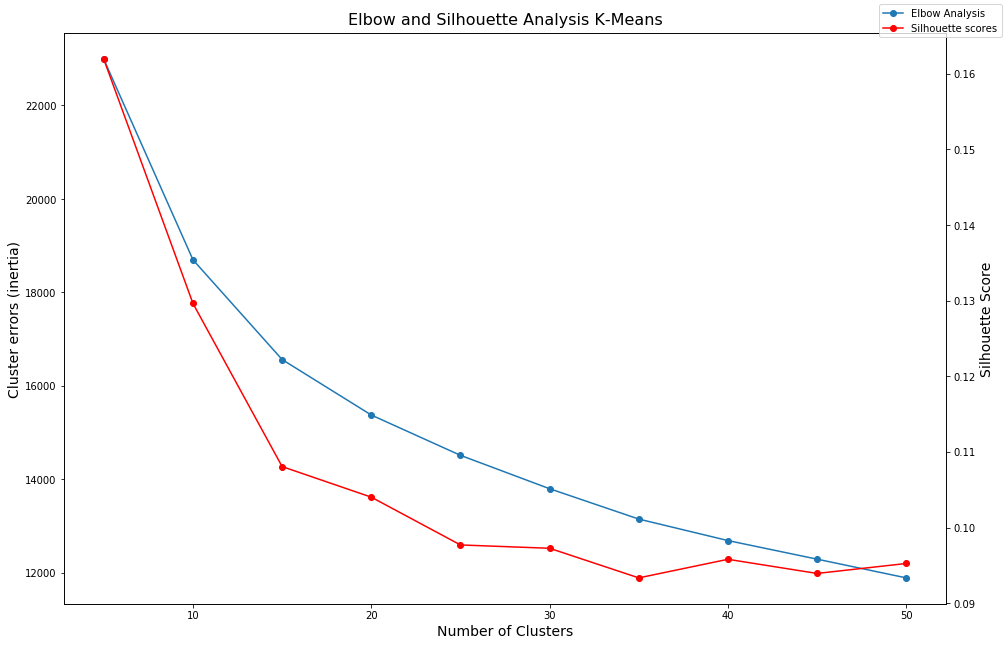

In [37]:
fig, ax1 = plt.subplots(figsize=(14,9))
ax1.set_xlabel("Number of Clusters", **axis_font)
ax1.set_ylabel("Cluster errors (inertia)", **axis_font)
ax1.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("Silhouette Score", **axis_font)  # we already handled the x-label with ax1
ax2.plot(clusters_df.num_clusters, clusters_df.cluster_silhouette, marker = "o", color='r')
ax2.tick_params(axis='y')
ax1.set_title('Elbow and Silhouette Analysis K-Means',**title_font)
fig.legend(['Elbow Analysis', 'Silhouette scores'], loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EandS_instacart.png', dpi=300)
plt.show()

0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 
0.129 --> 0.125 --> 0.117 --> 0.115 --> 0.114 --> 0.114 --> 


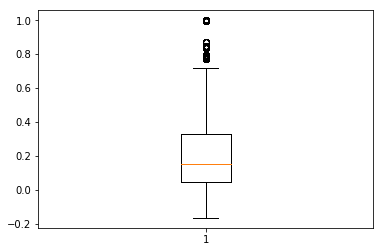

In [38]:
#K-Shape
return_pred=0

cluster_silhouette_kshape=[]
## Time Series Silhouette and adjusted rand score
for n_clusters in cluster_range:
    formatted_dataset = Time_Series.to_time_series_dataset(ts)
    X_train, sz = Time_Series.normalize_data(formatted_dataset)
    ks, y_pred = Time_Series.k_shape(X_train, n_clusters=num_cluster)
    scores = Time_Series.compute_scores(ks, X_train, y_pred)
    plt.boxplot(scores)
    silhouette= tslearn.clustering.silhouette_score(X_train, y_pred, metric="euclidean")
    cluster_silhouette_kshape.append(silhouette)

clusters_df_kshape = pd.DataFrame( { "num_clusters":cluster_range, "cluster_silhouette": cluster_silhouette } )

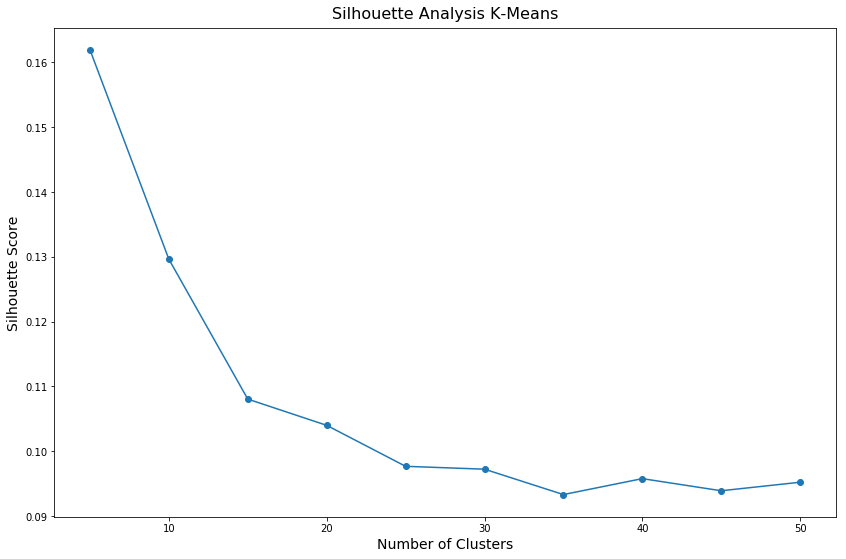

In [39]:
plt.figure(figsize=(14,9))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_silhouette, marker = "o" )
plt.title('Silhouette Analysis K-Means',**title_font)
plt.xlabel("Number of Clusters", **axis_font)
plt.ylabel("Silhouette Score", **axis_font)
plt.savefig('S_instacart.png', dpi=300)

### K-Means

In [3]:
num_cluster=5
pred=Features.cluster_features(train, test, data, num_cluster, batch, dataset)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
user_features=['user_id','total', 'total_reorder', 'Totalmin', 'Totalmax',
       'Totalmean', 'order_numbermax', 'days_since_prior_ordermin',
       'days_since_prior_ordermax', 'days_since_prior_ordermean',
       'reordermin', 'reordermax', 'reordermean',
       'order_hour_of_daymin', 'order_hour_of_daymax', 'order_hour_of_daymean',
       'days_since_prior_ordermin', 'days_since_prior_ordermax',
       'days_since_prior_ordermean', 'order_dowmean']

train=train.drop_duplicates(subset='user_id', keep='first')
train1=train[user_features]
      
    


x = StandardScaler().fit_transform(train1)

#PCA in 1 component
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/grecia/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


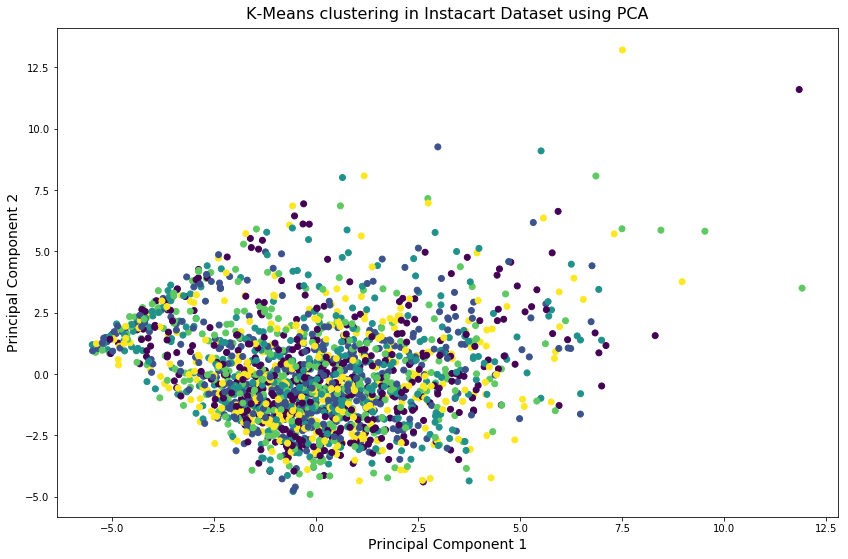

In [8]:
import matplotlib.pyplot as plt
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}


plt.figure(figsize=(14,9))

plt.style.use('seaborn-dark-palette')
plt.scatter(principalComponents.T[0], principalComponents.T[1], c=pred.cluster)
plt.ylabel('Principal Component 2', **axis_font)
plt.xlabel('Principal Component 1', **axis_font)
plt.title('K-Means clustering in Instacart Dataset using PCA', **title_font)
plt.savefig('kshape_instacart.png', dpi=300)
plt.show()

### Community Detection

In [9]:
import networkx as nx
from community import community_louvain

FG = nx.from_pandas_edgelist(train, source='user_id', target='product_name', edge_attr=True) 
parts = community_louvain.best_partition(FG)
values = [parts.get(node) for node in FG.nodes()]
len(np.unique(values))



12

In [32]:
#Make a subgraph with just 6 users
users=train.user_id.unique()
sub_users=users[35:40]
sub =train[train.user_id.isin(sub_users)]

sub_products=sub.product_name.unique()
sub_components=np.append(sub_products, sub_users)

In [33]:
node_colors=[parts.get(node) for node in sub_components]

In [34]:
import networkx as nx
from community import community_louvain
FG = nx.from_pandas_edgelist(sub, source='user_id', target='product_name', edge_attr=True) 
parts = community_louvain.best_partition(FG)
values = [parts.get(node) for node in FG.nodes()]
len(np.unique(values))

5

/home/grecia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


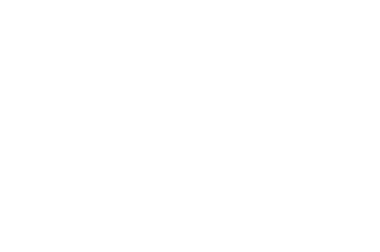

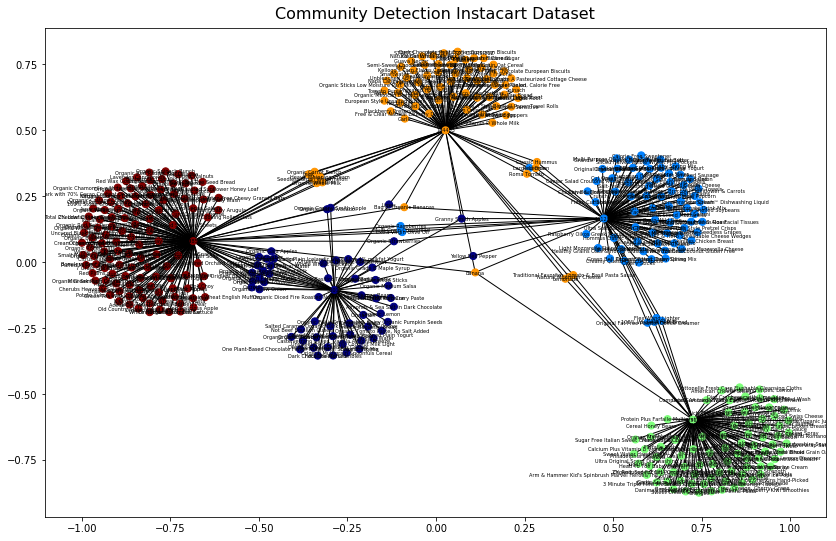

In [35]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(FG)

title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}
plt.axis("off")
plt.figure(3,figsize=(14,9))
plt.title('Community Detection Instacart Dataset', **title_font)
plt.savefig('louvain_instacart.png', dpi=300)
nx.draw_networkx(FG, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size =50 , font_size=5, with_labels =True)
plt.savefig('louvain_instacart.png', dpi=300)

In [69]:
# If your Graph has more than one component, this will return False:
#print(nx.is_connected(FG))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
#components = nx.connected_components(FG)
#largest_component = max(components, key=len)

subgraph = FG.subgraph(sub_components)

/home/grecia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


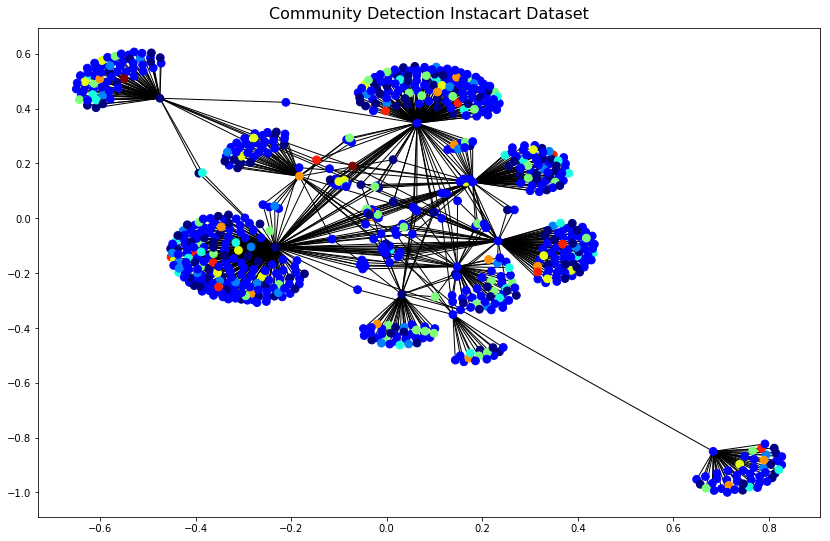

In [70]:
import matplotlib.pyplot as plt
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

pos = nx.spring_layout(subgraph)

plt.figure(3,figsize=(14,9))
plt.title('Community Detection Instacart Dataset', **title_font)
plt.savefig('louvain_instacart.png', dpi=300)
nx.draw_networkx(subgraph, pos = pos, cmap = plt.get_cmap("jet"), node_size =60 ,node_color = node_colors, font_size=8, with_labels =False)


## Ensemble

(201917, 7)
(123623, 6)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(1000000, 15)
(75392, 15)
RECEIVED DATASET


/home/grecia/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


0.071 --> 0.055 --> 0.049 --> 0.048 --> 0.048 --> 
For n_clusters = 25 The average silhouette_score is : -0.0710535992058564


/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


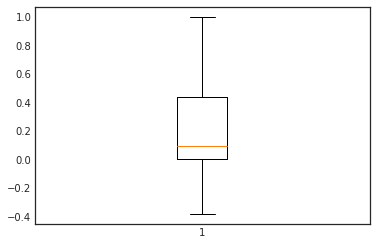

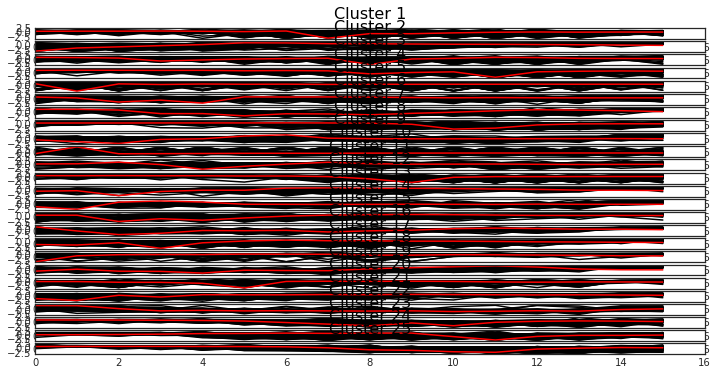

/home/grecia/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


FINISH METHODS FOR SINGLE CLUSTER


In [24]:
#single clustering
dataset_list=['elo']
scores_df=pd.DataFrame(columns=['method', 'clustering', 'ensemble', 'score', 'batch', 'cluster_num', 'database'])
cluster_user=pd.DataFrame(columns=['batch', 'cluster', 'clustering', 'user_id', 'ensemble', 'databse'])

single_clustering_list=[Features.cluster_features,Graph.cluster_graph, Time_Series.cluster_kshape]
single_clustering_name=['cluster_features','cluster_graph', 'cluster_timeseries']

clustering_labels=pd.DataFrame()
for dataset in dataset_list:
    train, test, data=get_data.get_data_batch(dataset, batch)
    if dataset=='instacart':
        num_clusters=5
    else: 
        num_clusters=25
    print('RECEIVED DATASET')
    
   
    # SINGLE CLUSTER
    b=0
    for clustering in single_clustering_list:
        clustering_labels_b=clustering(train, test,data, num_clusters, batch, dataset)
        
        
        if dataset=='instacart':
            clustering_labels_b['ensemble']='no_ensemble'
            clustering_labels_b['database']='instacart'
            clustering_labels_b['card_id']=clustering_labels_b['user_id']
            clustering_labels=clustering_labels.append(clustering_labels_b)

            test_b = test.merge(clustering_labels_b, on='user_id')
            train_b = train.merge(clustering_labels_b, on='user_id')
            data_b=data
            
        else:
            clustering_labels_b['ensemble']='no_ensemble'
            clustering_labels_b['database']='elo'
            clustering_labels_b['user_id']=clustering_labels_b['card_id']
            clustering_labels=clustering_labels.append(clustering_labels_b)
            

            test_b = test.merge(clustering_labels_b, on='card_id')
            train_b = train.merge(clustering_labels_b, on='card_id')
            data_b= data.merge(clustering_labels_b, on='card_id')
        
        #clustering_labels.to_csv(file_save_clusters)
        
        cluster_list = train_b.cluster.unique()
        for cluster in cluster_list:
            try:
                data_cluster= data_b[data_b["cluster"]==cluster]
            except:
                data_cluster=data
            train_cluster=train_b[train_b["cluster"]==cluster]
            test_cluster=test_b[test_b["cluster"]==cluster]
            train_cluster=train_cluster.drop(columns=['cluster'])
            test_cluster=test_cluster.drop(columns=['cluster'])
        b=b+1
        
    print('FINISH METHODS FOR SINGLE CLUSTER')


In [25]:
clustering_labels

clustering_labels_i=clustering_labels[clustering_labels['database']==dataset]
cluster_table=pd.pivot_table(clustering_labels_i, values='cluster', index=['user_id'], 
                      columns=['type_cluster'], aggfunc=np.sum).dropna(how='any', axis=0)
list_ensembles=np.append([np.array(cluster_table.cluster_features), np.array(cluster_table.cluster_kshape)], [np.array(cluster_table.cluster_graph)], axis=0)


In [26]:
list_ensembles

array([[20.,  4., 20., ..., 23.,  7.,  0.],
       [24., 21.,  3., ..., 10.,  3.,  3.],
       [ 6., 33.,  4., ...,  7.,  4., 17.]])

### MCA

In [27]:
#MCA
import prince
def do_mca(list_ensembles):
    mca = prince.MCA(n_components=1,n_iter=3, copy=True, check_input=True, engine='auto',
         random_state=42)
    mca_t = mca.fit_transform(list_ensembles.T)
    return mca_t.values

a=do_mca(list_ensembles)

In [28]:
a

array([[ 0.31978651],
       [ 0.53686548],
       [-0.07958386],
       ...,
       [ 0.5796498 ],
       [-0.19441165],
       [-0.39699619]])

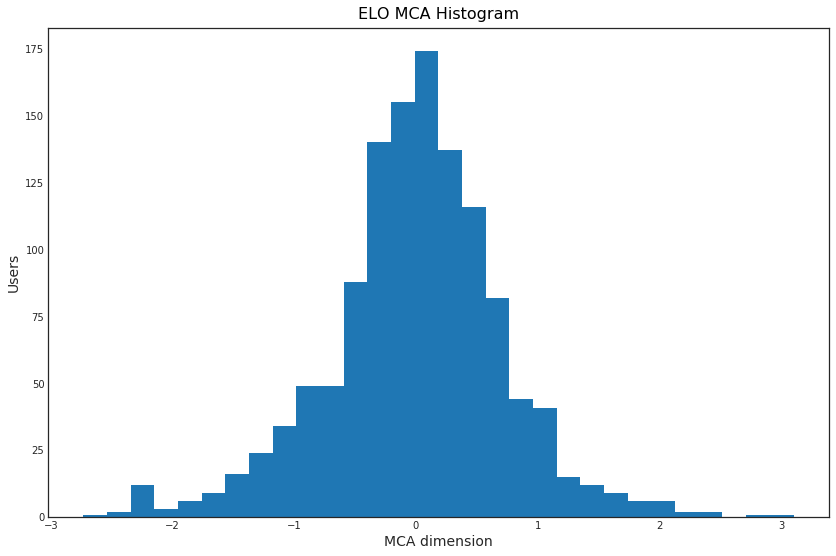

In [29]:
#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

plt.figure(figsize=(14,9))
plt.hist(a, bins = 30)
plt.title('ELO MCA Histogram',**title_font)
plt.xlabel("MCA dimension", **axis_font)
plt.ylabel("Users", **axis_font)
plt.savefig('Histogram_elo.png', dpi=300)



/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


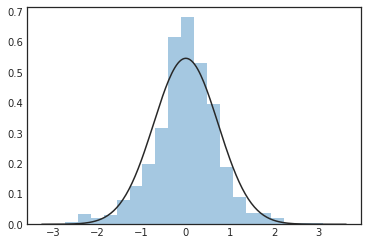

In [30]:
from scipy import stats
sns.distplot(a, fit=stats.norm, bins=20, kde=False,)

In [31]:
##UNIVARIATE GMM
import random
from sys import maxsize
from scipy.stats import norm
def PosSymDefMatrix(n,sd):
    M = np.matrix(np.random.rand(n,n))
    M = 0.5*(M + M.T)
    M = M + sd*np.eye(n)
    return M


def distance(old_params, new_params, N, M, H):
    dist = 0
    for i in range(M):
        for j in range(H):
            dist+=(old_params['mu'][0][i][j]-new_params['mu'][0][i][j])**2
    return dist**0.5


def prob(val, mu, sig, lam):
    p = lam
    for i in range(len(val)):
        p *= norm.pdf(val[i], mu[i], sig[i][i])
    return p

def expectation(dataFrame, parameters,N, M, H):
    p_cluster=pd.DataFrame(0,range(N),range(M))
    for i in range(N):
        for j in range(M):
            p_cluster.loc[[i],[j]]=prob(np.array(dataFrame.iloc[i,:H]), list(parameters['mu'][0][j]), list(parameters['sig'][0][j]), parameters['lambda'][0][j])
        dataFrame['label'][i]=np.argmax(p_cluster.iloc[[i]].values)
    return dataFrame, p_cluster

def maximization(dataFrame, parameters, N, M, H):
    len_points=np.zeros(M)
    for i in range(M):
        points=dataFrame[dataFrame['label']==i]
        len_points[i]=len(points)
        mu=np.zeros(H)
        sig=np.zeros([H, H])
        for j in range (H):
            mu[j]=points[j].mean()
            for k in range (H):
                if j==k:
                    sig[j][k]=points[j].std()
                else:
                    sig[j][k]=0

        parameters['mu'][0][i]=mu
        parameters['sig'][0][i]=sig
    parameters['lambda'][0]=len_points/N
    return parameters

def emProcess(list_ensembles,nEnsCluster, iterations, data):

    N=len(list_ensembles) 
    H = 1
    M=nEnsCluster

    df = pd.DataFrame(list_ensembles, columns= np.arange(H))
    df.index.name = 'objs'
    df.columns.name = 'partition'
    X=df.values
    #Initialize parameters

    k=[random.randrange(len(X)) for _ in range(M)]
    mu=[M,H]
    lam=np.ones(M) / M

    Cov=[PosSymDefMatrix(H,i) for i in range(M)]
    broadness = 2

    mu=np.empty([M, H])
    sig = np.empty([M, H, H])
    
    for j in range(M):
        mu[j,:] = X[k[j]]
        sig[j,:,:] = np.mean(np.array(Cov[j]), axis=0)+broadness
    
    guess={'mu':mu,
          'sig':sig,
          'lambda':lam}


    shift = maxsize
    epsilon = 0.01
    iters = iterations
    df_copy = df.copy()

    df_copy['label']=map(lambda x:x+1, np.random.choice (M,len(df))) 
    params = pd.DataFrame.from_dict(guess, orient = 'index')
    params = params.transpose()
    

    while shift > epsilon:
        iters += 1
        updated_labels, p_cluster = expectation(df_copy.copy(), params, N, M, H)
        updated_parameters = maximization(updated_labels, params.copy(), N, M, H)
        shift = distance(params, updated_parameters, N, M, H)
        df_copy = updated_labels
        params = updated_parameters
    return np.array(df_copy.label), p_cluster, updated_parameters, df_copy




mixtureObj, p_cluster, updated_parameters, df_copy = emProcess(a, 5, 10, data)

/home/grecia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
p5

Int64Index([], dtype='int64', name='objs')

/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00415867, 0.00831734, 0.04990406, 0.01247601, 0.02495203,
        0.03742804, 0.06653874, 0.09980811, 0.14139483, 0.2037749 ,
        0.2037749 , 0.36596309, 0.582214  , 0.64459407, 0.72360883,
        0.56973799, 0.48240589, 0.34101106, 0.18298154, 0.17050553,
        0.06238007, 0.04990406, 0.03742804, 0.02495203, 0.02495203,
        0.00831734, 0.00831734, 0.        , 0.00415867, 0.00415867]),
 array([-2.73367374, -2.53912567, -2.34457761, -2.15002954, -1.95548147,
        -1.76093341, -1.56638534, -1.37183727, -1.17728921, -0.98274114,
        -0.78819307, -0.59364501, -0.39909694, -0.20454888, -0.01000081,
         0.18454726,  0.37909532,  0.57364339,  0.76819146,  0.96273952,
         1.15728759,  1.35183566,  1.54638372,  1.74093179,  1.93547986,
         2.13002792,  2.32457599,  2.51912406,  2.71367212,  2.90822019,
         3.10276826]),
 <a list of 30 Patch objects>)

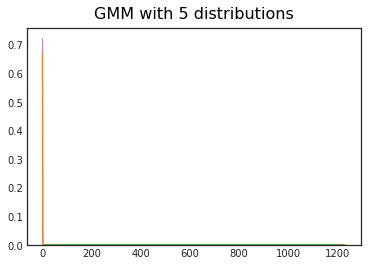

In [36]:
#mixture
p1=df_copy[df_copy['label']==0].index
p2=df_copy[df_copy['label']==1].index
p3=df_copy[df_copy['label']==2].index
p4=df_copy[df_copy['label']==3].index
p5=df_copy[df_copy['label']==4].index

x = np.linspace(-4,2, 6)
plt.hist(a, bins = 30, normed=1)

#plt.plot(a,updated_parameters['lambda'][0][1]*stats.norm.pdf(a,updated_parameters['mu'][0][1][0],updated_parameters['sig'][0][1][0][0]), c='blue')
#plt.plot(a,updated_parameters['lambda'][0][0]*stats.norm.pdf(a,updated_parameters['mu'][0][0][0],updated_parameters['sig'][0][0][0][0]), c='red')

#plt.plot(a,updated_parameters['lambda'][0][2]*stats.norm.pdf(a,updated_parameters['mu'][0][2][0],updated_parameters['sig'][0][2][0][0]), c='green')
#plt.plot(a,updated_parameters['lambda'][0][3]*stats.norm.pdf(a,updated_parameters['mu'][0][3][0],updated_parameters['sig'][0][3][0][0]), c='yellow')
#plt.plot(a,updated_parameters['lambda'][0][4]*stats.norm.pdf(a,updated_parameters['mu'][0][4][0],updated_parameters['sig'][0][4][0][0]), c='orange')
g_1 = stats.norm(updated_parameters['mu'][0][0], updated_parameters['sig'][0][0]).pdf(p1)
g_2 = stats.norm(updated_parameters['mu'][0][1], updated_parameters['sig'][0][1]).pdf(p2)
g_3 = stats.norm(updated_parameters['mu'][0][2], updated_parameters['sig'][0][2]).pdf(p3)
g_4 = stats.norm(updated_parameters['mu'][0][3], updated_parameters['sig'][0][3]).pdf(p4)
g_5 = stats.norm(updated_parameters['mu'][0][4], updated_parameters['sig'][0][4]).pdf(p5)
plt.title('GMM with 5 distributions', **title_font)
plt.plot(p1, g_1[0], label='gaussian mixture1')
plt.plot(p2, g_2[0], label='gaussian mixture2')
plt.plot(p3, g_3[0], label='gaussian mixture3')
plt.plot(p4, g_4[0], label='gaussian mixture4')
plt.plot(p5, g_5[0], label='gaussian mixture5')
plt.hist(a, bins = 30, normed=1)


### Voting

In [91]:
relabeled_clusters=Voting_MM_GMM_torch.relabel_cluster(list_ensembles)
vot_matrix=Voting_MM_GMM_torch.voting(relabeled_clusters)

(3, 1236)
(1236, 3)
1236
37
b= 0
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 2
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 3
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 4
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a

a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 80
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 81
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 82
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 83
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23

a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 126
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 127
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 128
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 129
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24

a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 172
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 173
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 174
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 175
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 2

a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 212
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 213
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 214
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 215
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 259
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 260
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 261
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 262
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 297
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 298
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 299
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 300
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 2

a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 336
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 337
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 338
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 339
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 340
a= 0
a= 1
a= 2
a= 3
a

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 388
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 389
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 390
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 391
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 435
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 436
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 437
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 438
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29

a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 481
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 482
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 483
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 484
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 3

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 530
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 531
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 532
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 533
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 573
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 574
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 575
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 576
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 3

a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 619
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 620
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 621
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 622
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 3

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 666
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 667
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 668
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 669
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 711
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 712
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 713
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 714
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 715
a= 0
a= 1

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 757
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 758
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 759
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 760
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 803
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 804
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 805
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 806
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 807
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 

a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 843
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 844
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 845
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 846
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 883
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 884
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 885
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 886
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 922
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 923
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 924
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 925
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a=

a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 968
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 969
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 970
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 971
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23


a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1014
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1015
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1016
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1017
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24


a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1059
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1060
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1061
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1062
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 2

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1105
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1106
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1107
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1108
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 2

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1149
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1150
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1151
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1152
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 2

a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1197
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1198
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1199
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 21
a= 22
a= 23
a= 24
a= 25
a= 26
a= 27
a= 28
a= 29
a= 30
a= 31
a= 32
a= 33
a= 34
a= 35
a= 36
b= 1200
a= 0
a= 1
a= 2
a= 3
a= 4
a= 5
a= 6
a= 7
a= 8
a= 9
a= 10
a= 11
a= 12
a= 13
a= 14
a= 15
a= 16
a= 17
a= 18
a= 19
a= 20
a= 2

In [93]:
vot_matrix.shape

(1236, 37)

In [ ]:
np.max(p_cluster.iloc[[i]].values)